Source codes for Python Machine Learning By Example 4th Edition (Packt Publishing)

Chapter 11 Categorizing Images of Clothing with Convolutional Neural Networks 

Author: Yuxi (Hayden) Liu (yuxi.liu.ece@gmail.com)

# Exploring the clothing image dataset 

In [1]:
import torch, torchvision 
from torchvision import transforms 

image_path = './'
transform = transforms.Compose([transforms.ToTensor(),
                               # transforms.Normalize((0.5,), (0.5,))
                               ])

train_dataset = torchvision.datasets.FashionMNIST(root=image_path, 
                                                  train=True, 
                                                  transform=transform, 
                                                  download=True)

test_dataset = torchvision.datasets.FashionMNIST(root=image_path, 
                                                 train=False, 
                                                 transform=transform, 
                                                 download=False)

In [2]:
print(train_dataset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [3]:
print(test_dataset)

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [4]:
from torch.utils.data import DataLoader

batch_size = 64
torch.manual_seed(42)
train_dl = DataLoader(train_dataset, batch_size, shuffle=True)

In [5]:
data_iter = iter(train_dl)
images, labels = next(data_iter)

In [6]:
print(labels)

tensor([5, 7, 4, 7, 3, 8, 9, 5, 3, 1, 2, 3, 2, 3, 3, 7, 9, 9, 3, 2, 4, 6, 3, 5,
        5, 3, 2, 0, 0, 8, 4, 2, 8, 5, 9, 2, 4, 9, 4, 4, 3, 4, 9, 7, 2, 0, 4, 5,
        4, 8, 2, 6, 7, 0, 2, 0, 6, 3, 3, 5, 6, 0, 0, 8])


In [7]:
# constant for classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [8]:
print(images[0].shape)

torch.Size([1, 28, 28])


In [9]:
print(torch.max(images), torch.min(images))

tensor(1.) tensor(0.)


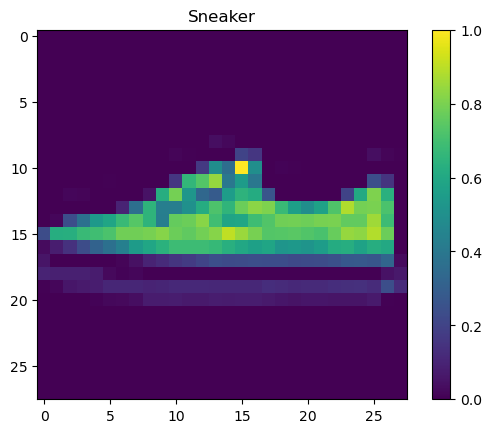

In [10]:
import numpy as np
import matplotlib.pyplot as plt

npimg = images[1].numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.colorbar()
plt.title(class_names[labels[1]])
plt.show()

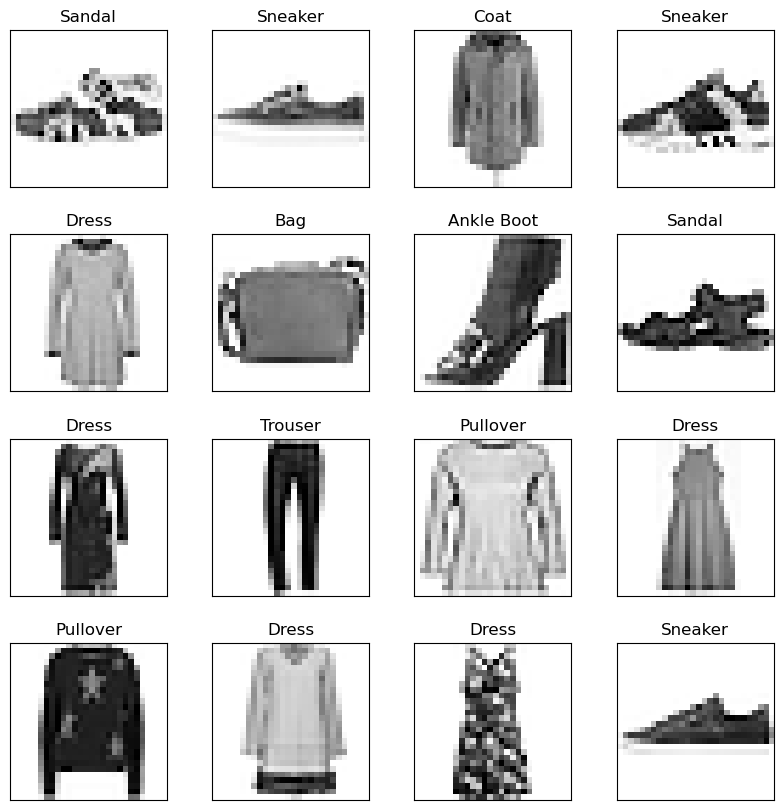

In [11]:
plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.subplots_adjust(hspace=.3)
    plt.xticks([])
    plt.yticks([])
    npimg = images[i].numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap="Greys")
    plt.title(class_names[labels[i]])
plt.show()


# Classifying clothing images with CNNs 

## Architecting the CNN model 

In [12]:
import torch.nn as nn
model = nn.Sequential()

In [13]:
model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3))
model.add_module('relu1', nn.ReLU()) 

In [14]:
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))

In [15]:
model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3))
model.add_module('relu2', nn.ReLU())   

In [16]:
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))

In [17]:
model.add_module('conv3', nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3))
model.add_module('relu3', nn.ReLU()) 

In [18]:
x = torch.rand((64, 1, 28, 28))
print(model(x).shape)

torch.Size([64, 128, 3, 3])


In [19]:
model.add_module('flatten', nn.Flatten()) 

In [20]:
print(model(x).shape)

torch.Size([64, 1152])


In [21]:
model.add_module('fc1', nn.Linear(1152, 64))
model.add_module('relu4', nn.ReLU()) 

In [22]:
model.add_module('fc2', nn.Linear(64, 10))
model.add_module('output', nn.Softmax(dim = 1))

In [23]:
print(model)

Sequential(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1152, out_features=64, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
  (output): Softmax(dim=1)
)


In [24]:
from torchsummary import summary

In [25]:
summary(model, input_size=(1, 28, 28), batch_size=-1, device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
         MaxPool2d-3           [-1, 32, 13, 13]               0
            Conv2d-4           [-1, 64, 11, 11]          18,496
              ReLU-5           [-1, 64, 11, 11]               0
         MaxPool2d-6             [-1, 64, 5, 5]               0
            Conv2d-7            [-1, 128, 3, 3]          73,856
              ReLU-8            [-1, 128, 3, 3]               0
           Flatten-9                 [-1, 1152]               0
           Linear-10                   [-1, 64]          73,792
             ReLU-11                   [-1, 64]               0
           Linear-12                   [-1, 10]             650
          Softmax-13                   [-1, 10]               0
Total params: 167,114
Trainable params:

## Fitting the CNN model 

In [26]:
device = torch.device("cuda:0")
# device = torch.device("cpu")
model = model.to(device) 

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [27]:
def train(model, optimizer, num_epochs, train_dl):
    for epoch in range(num_epochs):
        loss_train = 0
        accuracy_train = 0
        for x_batch, y_batch in train_dl:
            x_batch = x_batch.to(device) 
            y_batch = y_batch.to(device) 
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_train += loss.item() * y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_train += is_correct.sum().cpu()

        loss_train /= len(train_dl.dataset)
        accuracy_train /= len(train_dl.dataset)
        
        print(f'Epoch {epoch+1} - loss: {loss_train:.4f} - accuracy: {accuracy_train:.4f}')


In [28]:
num_epochs = 30
train(model, optimizer, num_epochs, train_dl)

Epoch 1 - loss: 1.7260 - accuracy: 0.7380
Epoch 2 - loss: 1.6543 - accuracy: 0.8075
Epoch 3 - loss: 1.6376 - accuracy: 0.8234
Epoch 4 - loss: 1.6277 - accuracy: 0.8341
Epoch 5 - loss: 1.5960 - accuracy: 0.8654
Epoch 6 - loss: 1.5823 - accuracy: 0.8792
Epoch 7 - loss: 1.5737 - accuracy: 0.8878
Epoch 8 - loss: 1.5679 - accuracy: 0.8939
Epoch 9 - loss: 1.5637 - accuracy: 0.8972
Epoch 10 - loss: 1.5593 - accuracy: 0.9018
Epoch 11 - loss: 1.5551 - accuracy: 0.9063
Epoch 12 - loss: 1.5501 - accuracy: 0.9111
Epoch 13 - loss: 1.5480 - accuracy: 0.9135
Epoch 14 - loss: 1.5479 - accuracy: 0.9133
Epoch 15 - loss: 1.5439 - accuracy: 0.9171
Epoch 16 - loss: 1.5435 - accuracy: 0.9176
Epoch 17 - loss: 1.5408 - accuracy: 0.9208
Epoch 18 - loss: 1.5413 - accuracy: 0.9199
Epoch 19 - loss: 1.5384 - accuracy: 0.9226
Epoch 20 - loss: 1.5355 - accuracy: 0.9257
Epoch 21 - loss: 1.5360 - accuracy: 0.9249
Epoch 22 - loss: 1.5346 - accuracy: 0.9263
Epoch 23 - loss: 1.5321 - accuracy: 0.9290
Epoch 24 - loss: 1.5

In [29]:
test_dl = DataLoader(test_dataset, batch_size, shuffle=False)

def evaluate_model(model, test_dl):
    accuracy_test = 0
    with torch.no_grad():
        for x_batch, y_batch in test_dl:
            pred = model.cpu()(x_batch)
            is_correct = torch.argmax(pred, dim=1) == y_batch
            accuracy_test += is_correct.float().sum().item()
    
    print(f'Accuracy on test set: {100 * accuracy_test / 10000} %')

evaluate_model(model, test_dl)

Accuracy on test set: 89.69 %


## Visualizing the convolutional filters 

In [30]:
conv3_weight = model.conv3.weight.data
print(conv3_weight.shape)

torch.Size([128, 64, 3, 3])


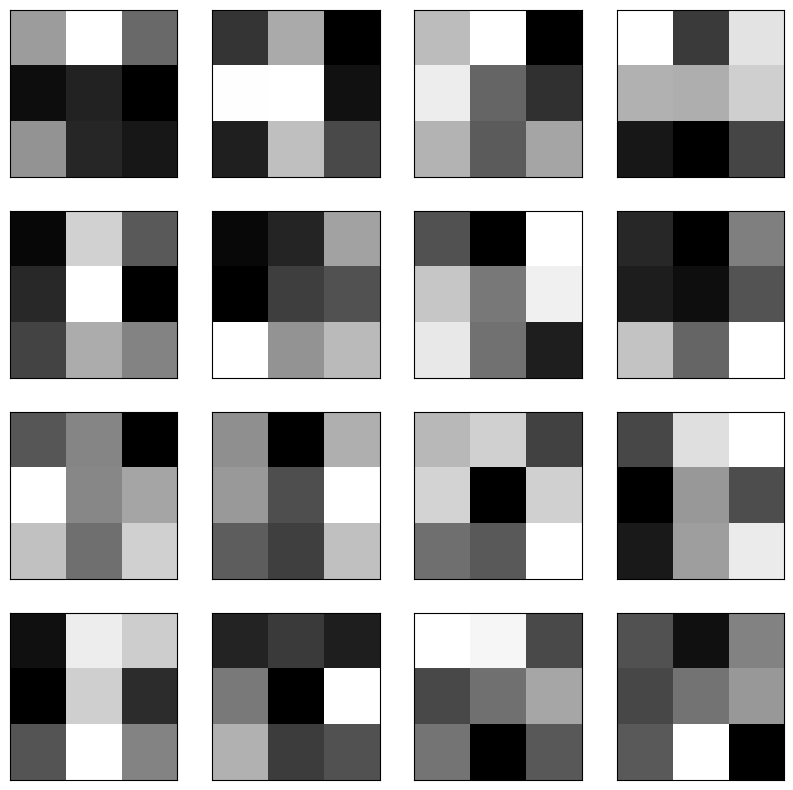

In [31]:
plt.figure(figsize=(10, 10))

n_filters = 16
for i in range(n_filters):
    weight = conv3_weight[i].cpu().numpy()
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(weight[0], cmap='gray')
 
plt.show()

# Boosting the CNN classifier with data augmentation 

## Flipping for data augmentation

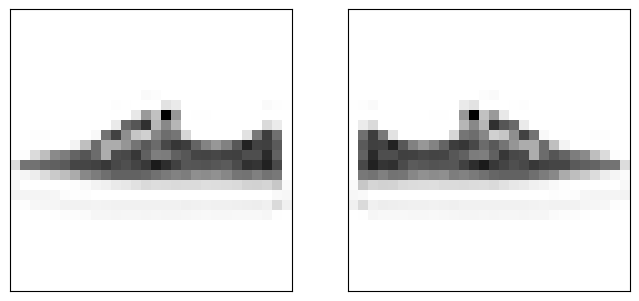

In [32]:
def display_image_greys(image):
    npimg = image.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap="Greys")
    plt.xticks([])
    plt.yticks([])


image = images[1]
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
display_image_greys(image)

## flipping (horizontally)
img_flipped = transforms.functional.hflip(image)
plt.subplot(1, 2, 2)
display_image_greys(img_flipped)

plt.show()
 

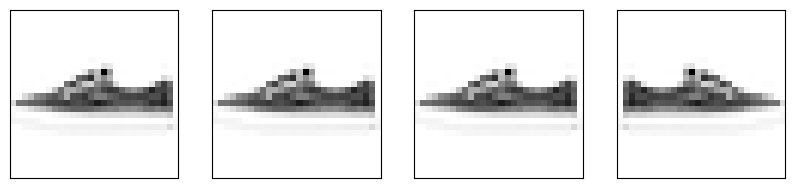

In [33]:
torch.manual_seed(42)
flip_transform = transforms.Compose([transforms.RandomHorizontalFlip()])

plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
display_image_greys(image)

for i in range(3):
    plt.subplot(1, 4, i+2)
    img_flip = flip_transform(image)
    display_image_greys(img_flip)

## Rotation for data augmentation

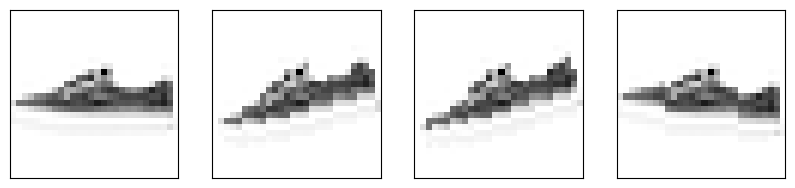

In [34]:
# rotate

torch.manual_seed(42)
rotate_transform = transforms.Compose([transforms.RandomRotation(20)])

plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
display_image_greys(image)

for i in range(3):
    plt.subplot(1, 4, i+2)
    img_rotate = rotate_transform(image)
    display_image_greys(img_rotate)

## Cropping for data augmentation

D:\anaconda3\envs\pyml\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


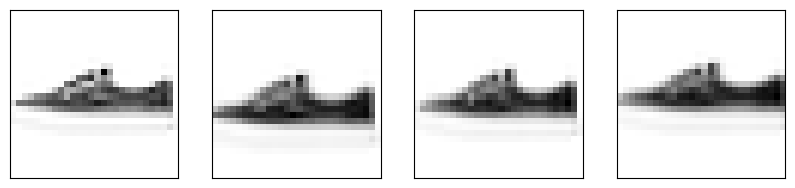

In [35]:
torch.manual_seed(42)
crop_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=(28, 28), scale=(0.7, 1))])

plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
display_image_greys(image)

for i in range(3):
    plt.subplot(1, 4, i+2)
    img_crop = crop_transform(image)
    display_image_greys(img_crop)
    

# Improving the clothing image classifier with data augmentation

In [36]:
torch.manual_seed(42)
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(size=(28, 28), scale=(0.9, 1)),
    transforms.ToTensor(),
])

 
train_dataset_aug = torchvision.datasets.FashionMNIST(root=image_path, 
                                                      train=True, 
                                                      transform=transform_train, 
                                                      download=False)


In [37]:
from torch.utils.data import Subset
train_dataset_aug_small = Subset(train_dataset_aug, torch.arange(500)) 

In [38]:
train_dl_aug_small = DataLoader(train_dataset_aug_small, batch_size, shuffle=True)

In [39]:
model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3))
model.add_module('relu1', nn.ReLU()) 
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))

model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3))
model.add_module('relu2', nn.ReLU())   
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))

model.add_module('conv3', nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3))
model.add_module('relu3', nn.ReLU()) 

model.add_module('flatten', nn.Flatten()) 
model.add_module('fc1', nn.Linear(1152, 64))
model.add_module('relu4', nn.ReLU()) 

model.add_module('fc2', nn.Linear(64, 10))
model.add_module('output', nn.Softmax(dim = 1))

model = model.to(device) 


In [40]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)        
train(model, optimizer, 1000, train_dl_aug_small)


Epoch 1 - loss: 2.3013 - accuracy: 0.1400
Epoch 2 - loss: 2.2805 - accuracy: 0.2100
Epoch 3 - loss: 2.1840 - accuracy: 0.3420
Epoch 4 - loss: 2.0742 - accuracy: 0.4000
Epoch 5 - loss: 2.0439 - accuracy: 0.4180
Epoch 6 - loss: 2.0443 - accuracy: 0.4140
Epoch 7 - loss: 2.0359 - accuracy: 0.4200
Epoch 8 - loss: 2.0310 - accuracy: 0.4340
Epoch 9 - loss: 2.0137 - accuracy: 0.4500
Epoch 10 - loss: 1.9830 - accuracy: 0.4900
Epoch 11 - loss: 1.9653 - accuracy: 0.5000
Epoch 12 - loss: 1.9542 - accuracy: 0.5060
Epoch 13 - loss: 1.9417 - accuracy: 0.5240
Epoch 14 - loss: 1.9463 - accuracy: 0.5060
Epoch 15 - loss: 1.9297 - accuracy: 0.5320
Epoch 16 - loss: 1.9171 - accuracy: 0.5480
Epoch 17 - loss: 1.9240 - accuracy: 0.5320
Epoch 18 - loss: 1.9121 - accuracy: 0.5500
Epoch 19 - loss: 1.9016 - accuracy: 0.5540
Epoch 20 - loss: 1.8838 - accuracy: 0.5900
Epoch 21 - loss: 1.8801 - accuracy: 0.5780
Epoch 22 - loss: 1.8583 - accuracy: 0.6180
Epoch 23 - loss: 1.8434 - accuracy: 0.6180
Epoch 24 - loss: 1.8

In [41]:
evaluate_model(model, test_dl)

Accuracy on test set: 78.64 %


# Advancing the CNN classifier with transfer learning  

In [42]:
from torchvision.models import resnet18
my_resnet = resnet18(weights='IMAGENET1K_V1')


In [43]:
my_resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

num_ftrs = my_resnet.fc.in_features
my_resnet.fc = nn.Linear(num_ftrs, 10)


In [44]:
my_resnet = my_resnet.to(device) 
optimizer = torch.optim.Adam(my_resnet.parameters(), lr=0.001)  
train(my_resnet, optimizer, 10, train_dl)

Epoch 1 - loss: 0.4805 - accuracy: 0.8284
Epoch 2 - loss: 0.3345 - accuracy: 0.8796
Epoch 3 - loss: 0.2892 - accuracy: 0.8962
Epoch 4 - loss: 0.2570 - accuracy: 0.9080
Epoch 5 - loss: 0.2325 - accuracy: 0.9148
Epoch 6 - loss: 0.2098 - accuracy: 0.9230
Epoch 7 - loss: 0.1931 - accuracy: 0.9291
Epoch 8 - loss: 0.1807 - accuracy: 0.9334
Epoch 9 - loss: 0.1724 - accuracy: 0.9369
Epoch 10 - loss: 0.1408 - accuracy: 0.9470


In [45]:
evaluate_model(my_resnet, test_dl)

Accuracy on test set: 90.87 %


---

Readers may ignore the next cell.

In [46]:
!jupyter nbconvert --to python ch11_part1.ipynb --TemplateExporter.exclude_input_prompt=True

[NbConvertApp] Converting notebook ch11_part1.ipynb to python
[NbConvertApp] Writing 8832 bytes to ch11_part1.py
